In [94]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [95]:
# Load in the data
data16 = pd.read_csv('final16.csv', index_col=[0])
data18 = pd.read_csv('final18.csv', index_col=[0])
normal16 = pd.read_csv('normal16.csv', index_col=[0])
normal18 = pd.read_csv('normal18.csv', index_col=[0])
normalTotal = pd.read_csv('normalTotal.csv', index_col=[0])

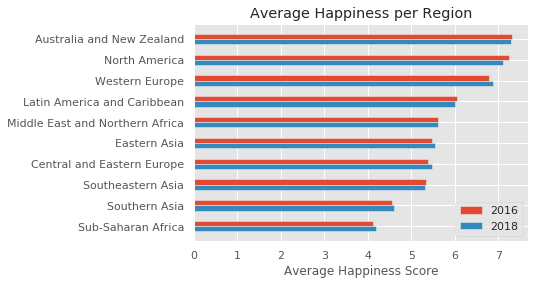

In [96]:
# Analysing average Happiness by different region and comparing the years
# Create grouped region data
def RegionData(reg):
    regData = reg[['Region', 'Happiness Score']]
    regData = regData.groupby(
        ['Region']).mean().reset_index().sort_values(by=['Happiness Score'], ascending=False)
    return regData

# Merge the two datasets
regData = pd.merge(RegionData(data16), RegionData(data18), on=['Region'], how='inner')
regData.columns = ['Region', '2016', '2018']

# Create Grpah
plt.style.use("ggplot") # Grpah style
x_index = np.arange(len(regData['Region'])) # Rearrange x indes to fit both graphs side by side
width = 0.25
happy16_y = regData['2016']
plt.barh(x_index-width/2, happy16_y, height=width, label='2016') # Plot 2016 data
happy18_y = regData['2018']
plt.barh(x_index+width/2, happy18_y, height=width, label='2018') # Plot 2018 data
plt.yticks(ticks=x_index, labels=regData['Region'])
plt.legend()
plt.title('Average Happiness per Region')
plt.xlabel('Average Happiness Score')
plt.gca().invert_yaxis() # Flip order of bars
#plt.show()

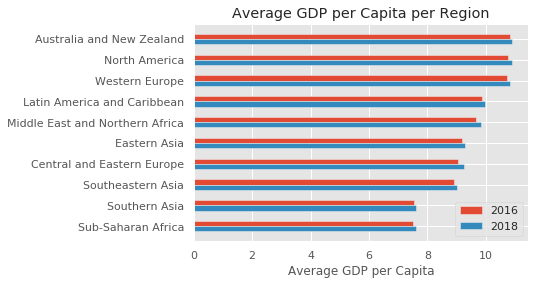

In [97]:
# Analysing average GDP per Capita by different region and comparing the years
# Create grouped region data
def gdpRegionData(reg):
    gdpData = reg[['Region', 'GDP per Capita']]
    gdpData = gdpData.groupby(
        ['Region']).mean().reset_index().sort_values(by=['GDP per Capita'], ascending=False)
    return gdpData

# Merge the two datasets
gdpData = pd.merge(gdpRegionData(data16), gdpRegionData(data18), on=['Region'], how='inner')
gdpData.columns = ['Region', '2016', '2018']

# Create Grpah
plt.style.use("ggplot") # Grpah style
x_index = np.arange(len(regData['Region'])) # Rearrange x indes to fit both graphs side by side
width = 0.25
gdp16_y = np.log(gdpData['2016'])
plt.barh(x_index-width/2, gdp16_y, height=width, label='2016') # Plot 2016 data
gdp18_y = np.log(gdpData['2018'])
plt.barh(x_index+width/2, gdp18_y, height=width, label='2018') # Plot 2018 data
plt.yticks(ticks=x_index, labels=regData['Region'])
plt.legend()
plt.title('Average GDP per Capita per Region')
plt.xlabel('Average GDP per Capita')
plt.gca().invert_yaxis() # Flip order of bars
#plt.show()

In [98]:
# Analysing average Happiness scale worldwide
data = [ dict(
 type='choropleth', # World map base
 locations = data18['Country'], # Input country data
 autocolorscale = True, # Scale colour gradient 
 z = data18['Happiness Score'], # Input happiness data
 locationmode = 'country names', # Map country names to places on map
 marker = dict(line = dict (color='rgb(217,230,29)', width=2)), # Pick colour options
 colorbar = dict(title = 'Happiness'))]
layout = dict(title = 'Top Countries by Happiness for 2018')
fig = go.Figure(data = data, layout = layout) # Plot figure
#fig.show()

In [99]:
# Analysing average Happiness scale worldwide
data2 = [ dict(
 type='choropleth', # World map base
 locations = data18['Country'], # Input country data
 autocolorscale = True, # Scale colour gradient 
 z = np.log(data18['GDP per Capita']), # Input happiness data
 locationmode = 'country names', # Map country names to places on map
 marker = dict(line = dict (color='rgb(217,230,29)', width=2)), # Pick colour options
 colorbar = dict(title = 'GDP per Capita'))]
layout2 = dict(title = 'Top Countries by GDP per Capita for 2018')
fig2 = go.Figure(data = data2, layout = layout2) # Plot figure
#fig2.show()

[(2, 8)]

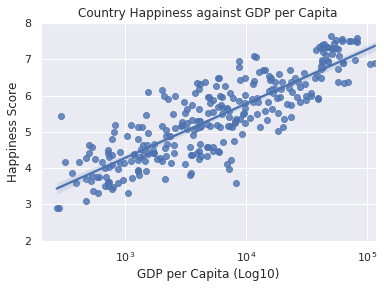

In [100]:
# Plot happiness againt GDP per Capita
gdpData = data16.append(data18).reindex()
sns.set(color_codes=True)
gdpGraph = sns.regplot(x="GDP per Capita", y="Happiness Score", data=gdpData, logx=True)
gdpGraph.set(xscale="log") # Normalise GDP with log function
gdpGraph.set_xlabel('GDP per Capita (Log10)')
gdpGraph.set_title('Country Happiness against GDP per Capita')
gdpGraph.set(ylim=(2, 8))

[Text(0.5, 0, 'GDP per Capita'),
 Text(1.5, 0, 'CO2 per Capita'),
 Text(2.5, 0, 'Air Quality'),
 Text(3.5, 0, 'Biodiversity'),
 Text(4.5, 0, 'Water Sanitation'),
 Text(5.5, 0, 'Happiness Score')]

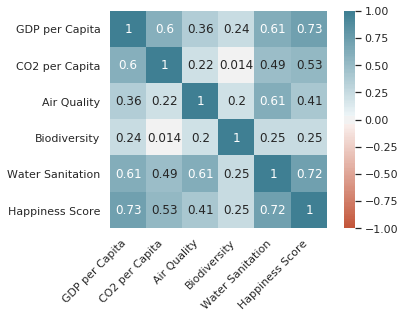

In [101]:
cor = normalTotal.corr()
heatmapTotal = sns.heatmap(cor, annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
heatmapTotal.set_xticklabels(heatmapTotal.get_xticklabels(), rotation=45, horizontalalignment='right')

In [102]:
covariance = np.cov()

TypeError: _cov_dispatcher() missing 1 required positional argument: 'm'